# **Nonlinear Models**

## **Concept**
### **Polynomial Regression**

* single variable
    * $y_i = \alpha + \beta_1 x^2 + \dots + \beta_i x^i + \varepsilon_i$
* multiple variable
    * example (2 variables): $\hat{y} = \alpha + \beta_1 X_1 + \beta_2 X_2 + \beta_3 X_1 X_2 + \beta_4 X_1^2 + \beta_5 X_2^2 + \varepsilon$
    
#### **Regularization**
* Reduce the degrees
* PolynomailFeatures(degree = d) transforms an array containing n features into an array containing $\frac{(n+d)!}{d!n!}$ features, where n! is the factorial of n, equal to 1 $\times$2$\times$3$\times$....$\times$n. 
* ***Beware of the combinationtorial explosion of the number of features!***

#### **Evaluation**
* performance of training data: good, but cross-validation metrics: poor $\Longrightarrow$ overfitting
* both poor $\Longrightarrow$ underfitting.
* **Learning Curves**

#### **Overfiiting _vs_ underfitting**

* Training error high +  no change by adding more data  $\Longrightarrow$ ***Underfitting***

* great gaps between the training error curve and testing error curve + more training input, the testing model curve close to training model $\Longrightarrow$ ***Overfitting***

* Some useful concepts:
    * Bias (incorrect assumption)
    * Variance (model is excessively sensititive to the small variance; e.g., high degree polynomial model)
    * Irreduciable errors (nosies in the data; cleaning up data and checking the data input)

### **Logistic Regression**
* probabilty estimation: $\hat{p} = h_\theta(x) = \sigma(\theta^T\cdot{x})$
* sigmoid function (s-shaped): $\sigma(\cdot)$
* logistic function: $\sigma(t) = \frac{1}{1+e^{-t}}$
* prediction: $$\begin{equation}
                   \hat{y} =\left\{
                   \begin{array}{@{}ll@{}}
                      0 & \text{if } \hat{p} < 0.5, \\
                      1 & \text{if } \hat{p} \geq{0.5}.
                   \end{array}\right.
                \end{equation}$$

#### **Cost function**
* single training instance: $$\begin{equation}
                               c(\theta) =\left\{
                               \begin{array}{@{}ll@{}}
                                   -log(\hat{p})      & \text{if } y = 1, \\
                                   -log(1 - \hat{p}) & \text{if } y = 0.
                               \end{array}\right.
                             \end{equation}$$

* cost function of all instance: $$J(\theta) = -\frac1{m}\sum_{i=1}^m[y^i log(\hat{p}^i)+(1-y^i)log(1-\hat{p}^i)]$$

* **convex** $\Longrightarrow$ Gradient Descent **GUARANTEES** the global minimum
    * logistic cost function partial deriviatives: $$\frac{\partial}{\partial{\theta}_j}J(\theta)=\frac1{m}\sum_{i=1}^m(\sigma(\theta^T\cdot{x^i})-y^i)x_j^i$$

### **Softmax Regression**
* support multiple classes 
* no need to train and combine multiple binary classifiers

#### **Softmax Function**
* 1. compute a score $s_k(x)$ for each class k, given an instance x: $s_k(x)=\theta_k^T\cdot{x}$
* 2. apply softmax function to the score to estimate the probablity of each class
* 3. each class: own dedicated parameter vector $\theta_k$ 
* 4. together: all $\theta_k$ stored as rows in a parameter matrix $\Theta$.
* 5. finally: $$\hat{p}_k=\sigma(s(x))_k=\frac{exp(s_k(x))}{\displaystyle\sum_{j=1}^K exp(s_j(x))}$$\
    **K**: the number of classes\
    **s(x)**: a vector containing the socres of each class for the instance x\
    __$\sigma(s(x))$__: the estimated probablity that the instance x belongs to class k given the scores of each class for that instance

#### **Prediction**
$\DeclareMathOperator*{\argmax}{arg\max}$
$$\hat{y} = \argmax_k \sigma(s(x))_k = \argmax_k s_k(x)= \argmax_k(\theta_k^T\cdot{x}) $$
* Predicting the highest estimated probablity (simply the class with the highest score) <br>
* argmax operator returns the value of a variable that maximizes a function
* returns the value of k that maximizes the estiamted probablity $\sigma(s(x))_k$.

#### **Cross entropy**
* minimize the cost function
* measure how well a set of estimated class probablities match the target clases

* Cross entropy cost function: $$J(\Theta)=-\frac{1}{m}\sum_{i=1}^m\sum_{k=1}^K y_k^i log(\hat{p}_k^i)$$
    * $y_k^i$ = 1, if the targe class for the *i*th instance is _k_;
    * y = 0 otherwise
    * K = 2, equivalent to the Logistic Regression's cost function
    * cross entropy $$H(p, q)= -\sum_x p(x)\log  q(x)$$
    * **The gradient vector of the cost function with regard to $\theta_k$**: $$\nabla\theta_kJ(\Theta)=\frac{1}{m}\sum_{i=1}^m(\hat{p}_k^i-y_k^i)x^i$$
    * Compute gradient vector for each class, then use Gradient Descent (or other optimazaiton algorithm) to find the parameter matrix $\Theta$ that minimize the cost function.

### 5. Pipelines
Data Pipelines simplify the steps of processing the data. We use the module  **Pipeline** to create a pipeline. We also use **StandardScaler** as a step in our pipeline.

### 6. Measures for In-Sample Evaluation

When evaluating our models, not only do we want to visualise the results, but we also want a quantitative measure to determine how accurate the model is.

Two very important measures that are often used in Statistics to determine the accuracy of a model are:

- **$R^2$ / R-squared**
- **Mean Squared Error (MSE)**

**R-squared**

R squared, also known as the coefficient of determination, is a measure to indicate how close the data is to the fitted regression line.
The value of the R-squared is the percentage of variation of the response variable (y) that is explained by a linear model.



**Mean Squared Error (MSE)**

The Mean Squared Error measures the average of the squares of errors, that is, the difference between actual value (y) and the estimated value (ŷ).


## **Examples**
### **Polynomial Regression**

In [28]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_

(array([3.22200525]), array([[0.72001926]]))

In [29]:
# e.g.,
Z = df[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']]
yhat = lm.predict(Z)

plt.figure(figsize=(width, height))

ax1 = sns.distplot(
    df['price'], 
    hist=False, 
    color="r", 
    label="Actual Value"
)
sns.distplot(
    Yhat, 
    hist=False, 
    color="b", 
    label="Fitted Values", 
    ax=ax1
)

plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price (in dollars)')
plt.ylabel('Proportion of Cars')

plt.show()
plt.close()

KeyError: "None of [Index(['horsepower', 'curb-weight', 'engine-size', 'highway-mpg'], dtype='object')] are in the [columns]"

In [30]:
# Use the following function to plot the data
def PlotPolly(model, independent_variable, dependent_variabble, Name):
    x_new = np.linspace(15, 55, 100)
    y_new = model(x_new)

    plt.plot(
        independent_variable,dependent_variabble, 
        '.', 
        x_new, 
        y_new, 
        '-'
    )
    plt.title('Polynomial Fit with Matplotlib for Price ~ Length')
    ax = plt.gca()
    ax.set_axis_bgcolor((0.898, 0.898, 0.898))
    fig = plt.gcf()
    plt.xlabel(Name)
    plt.ylabel('Price of Cars')

    plt.show()
    plt.close()

In [ ]:
# Example for polynomial function
# set variables
x = df['highway-mpg']
y = df['price']

# Here we use a polynomial of the 3rd order (cubic) 
f = np.polyfit(x, y, 3)
p = np.poly1d(f)

# plot the results
PlotPolly(p,x,y, 'highway-mpg')

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
pr=PolynomialFeatures(degree=2)
Z_pr=pr.fit_transform(Z)

Pipelines

In [32]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
Input=[('scale',StandardScaler()),
       ('polynomial', PolynomialFeatures(include_bias=False)),
       ('model', LinearRegression())]

pipe=Pipeline(Input)
pipe.fit(Z,y)
ypipe=pipe.predict(Z)

NameError: name 'Z' is not defined

In [31]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

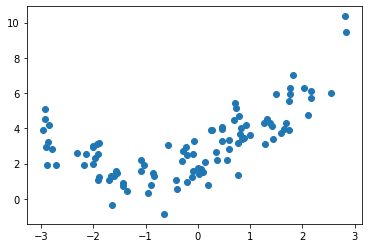

In [11]:
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)
plt.scatter(X, y)
plt.show()

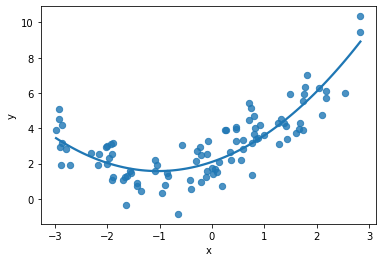

In [12]:
df_x = pd.DataFrame(X)
df_y = pd.DataFrame(y)
df =  pd.concat([df_x, df_y], axis=1)
df.columns = ['x', 'y']
ax = sns.regplot(
    x='x', 
    y='y', 
    data=df, 
    scatter_kws={"s": 40}, 
    order=2, 
    ci=None, 
    truncate=True
)

In [13]:
# Use the following function to plot the polynomial data
def PlotPolly(model, independent_variable, dependent_variabble, Name):
    x_new = np.linspace(15, 55, 100)
    y_new = model(x_new)

    plt.plot(
        independent_variable,dependent_variabble, 
        '.', 
        x_new, 
        y_new, 
        '-'
    )
    plt.title('Polynomial Fit with Matplotlib for Price ~ Length')
    ax = plt.gca()
    ax.set_axis_bgcolor((0.898, 0.898, 0.898))
    fig = plt.gcf()
    plt.xlabel(Name)
    plt.ylabel('Price of Cars')

    plt.show()
    plt.close()

In [14]:
# Here we use a polynomial; Need some work
f = np.polyfit(X, y, 2)
p = np.poly1d(f)

# plot the results
PlotPolly(p,X,y, 'Random')

TypeError: expected 1D vector for x

In [20]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree = 2, include_bias =  False)
X_poly = poly_features.fit_transform(X)
print(X[0])
print(X_poly[0])
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree = 2, include_bias =  False)
X_poly = poly_features.fit_transform(X)
print(X[0])
print(X_poly[0])

[-1.61346907]
[-1.61346907  2.60328243]
[-1.61346907]
[-1.61346907  2.60328243]


### Learning Curves

In [25]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(
        X, y, test_size = 0.2
    )
    train_errors, val_errors = [],[]
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_pred = model.predict(X_train[:m])
        y_val_pred = model.predict(X_val)
        train_errors.append(
            mean_squared_error(y_train_pred, y_train[:m])
        )
        val_errors.append(mean_squared_error(y_val_pred, y_val))
    plt.plot(
        np.sqrt(train_errors), 
        'r-+', 
        linewidth=2, 
        label='train'
    )
    plt.plot(
        np.sqrt(val_errors), 
        'b-', 
        linewidth=3, 
        label='val'
    )

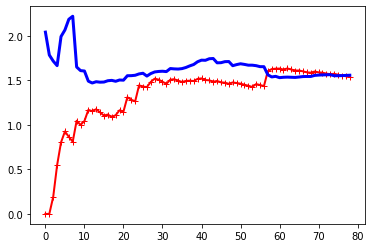

In [26]:
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)

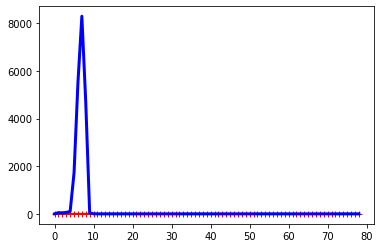

In [27]:
from sklearn.pipeline import Pipeline

polynomial_regression = Pipeline (
    (
        (
            'poly_features', 
            PolynomialFeatures(
                degree = 10, 
                include_bias=False
            )
        ),
        ('sgd_reg', LinearRegression()),
    )
)

plot_learning_curves(polynomial_regression, X, y)

### **Logistic Regression**
**Decision boundary**: iris example

In [9]:
from sklearn import datasets
import numpy as np
import matplotlib.pyplot as plt

iris = datasets.load_iris()
print(list(iris.keys()))

['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename']


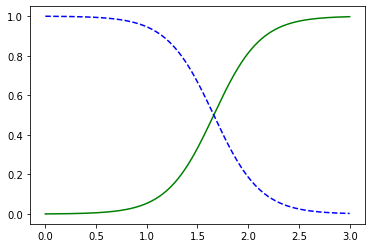

array([1, 0, 0])

In [10]:
X = iris['data'][:, 3:]
y = (iris['target'] == 2).astype(np.int)

from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(X, y)

# look at the model's probalities for flowers with petal widths varying from 0 to 3 cm
X_new =  np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)
plt.plot(X_new, y_proba[:, 1], 'g-', label = 'iris-Virginica')
plt.plot(X_new, y_proba[:, 0], 'b--', label = 'Not iris-Virginica')
plt.show()

# prediction example
log_reg.predict([[1.7], [1.61], [1.62]]) # as see the cut-off point around 1.61

In [5]:
# logistic regression with l1 penalty
log_reg_l1 = LogisticRegression(penalty='l1')
log_reg_l1.fit(X, y)

# look at the model's probalities for flowers with petal widths varying from 0 to 3 cm
X_new =  np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg_l1.predict_proba(X_new)
plt.plot(X_new, y_proba[:, 1], 'g-', label = 'iris-Virginica')
plt.plot(X_new, y_proba[:, 0], 'b--', label = 'Not iris-Virginica')
plt.show()

ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

* **logistic regression with l1 penalty**
* **sklearn default to set l2 penalty with logistic regression**

In [6]:
log_reg_l2 = LogisticRegression(penalty='l2')
log_reg_l2.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

* **look at the model's probalities for flowers with petal widths varying from 0 to 3 cm**

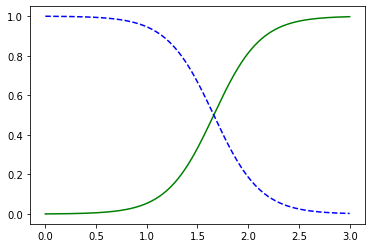

In [7]:
X_new =  np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg_l2.predict_proba(X_new)
plt.plot(X_new, y_proba[:, 1], 'g-', label = 'iris-Virginica')
plt.plot(X_new, y_proba[:, 0], 'b--', label = 'Not iris-Virginica')
plt.show()

### **Softmax regression**

In [8]:
# EXAMPLE
# 'lbfgs' support the Softmax Regression
# 'l2' regularization is controlled by hyperparameter C

X = iris['data'][:, (2, 3)] ## petal widths
y = iris['target']

softmax_reg = LogisticRegression(
    multi_class='multinomial', 
    solver='lbfgs', 
    C=10
)
softmax_reg.fit(X, y)

print(softmax_reg.predict([[5, 2]]))
print(softmax_reg.predict_proba([[5, 2]]))

[2]
[[6.38014896e-07 5.74929995e-02 9.42506362e-01]]
